# Exercise 08 : Seaborn

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## The project1 was a competition. It had longer deadlines and much more commits than ordinary labs had. Let us see the dynamic of commits in this project per user.

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

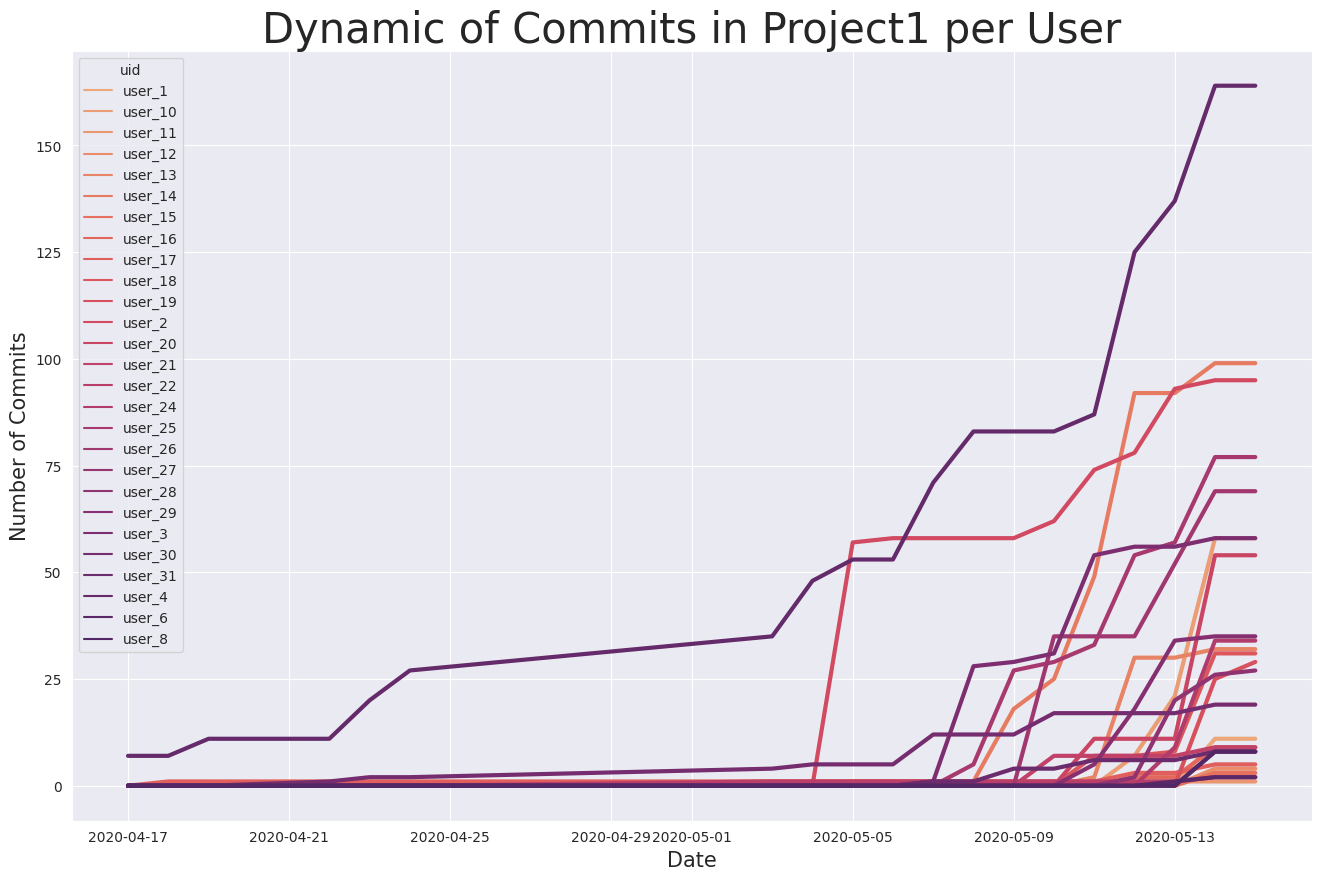

In [3]:
query = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%' AND status = 'ready' AND labname = 'project1'
"""
df = pd.read_sql(query, conn)
conn.close()

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

commits = df.pivot_table(index='date', columns='uid', aggfunc='size', fill_value=0).cumsum().stack().reset_index(name='cumulative_commits')

plt.figure(figsize=(16, 10))
sns.set_style('darkgrid')
sns.lineplot(data=commits, x='date', y='cumulative_commits', palette='flare', hue='uid', linewidth=3) # palette='tap20c'
plt.title('Dynamic of Commits in Project1 per User', fontsize=30)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Commits', fontsize=15)
plt.show()

#### Which user was the leader in the number of commits almost all of the time?
    user_4
#### Which user was the leader for only a short period of time?
    user_2